In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from webweb import Web
import matplotlib
import matplotlib.pyplot as plt

from src import load, analyse, plotting

In [2]:
prem = load.load_basic_transfer_networks()
champ = load.load_basic_transfer_networks(league="english_championship")

# Leicester

In [3]:
lcfc = 'leicester city'

# get network objects for prem and champ seasons with LCFC in them
champ_with_lcfc = {year: t for year, t in champ.items() if lcfc in t.league_clubs}
prem_with_lcfc = {year: t for year, t in prem.items() if lcfc in t.league_clubs}
all_with_lcfc = {**champ_with_lcfc, **prem_with_lcfc}
all_with_lcfc.keys()

dict_keys([2004, 2005, 2006, 2007, 2009, 2010, 2011, 2012, 2013, 2000, 2001, 2003, 2014, 2015, 2016, 2017, 2018, 2019, 2020])

In [5]:
# get degrees for each network
lcfc_degs = pd.DataFrame(columns=["in-degree", "out-degree"])
start_year, end_year = 2009, 2020
for year in range(start_year, end_year + 1):
    t = all_with_lcfc.get(year)
    if t is not None:
        out_degrees = {club: t.G.out_degree(club) for club in t.league_clubs}
        lcfc_degs.loc[year, "out-degree"] = out_degrees[lcfc]
        in_degrees = {club: t.G.in_degree(club) for club in t.league_clubs}
        lcfc_degs.loc[year, "in-degree"] = in_degrees[lcfc]
    else:
        lcfc_degs.loc[year, "in-degree"] = None
        lcfc_degs.loc[year, "out-degree"] = None

lcfc_degs.head()

,in-degree,out-degree
2009,28,30
2010,41,38
2011,32,34
2012,24,27
2013,24,21


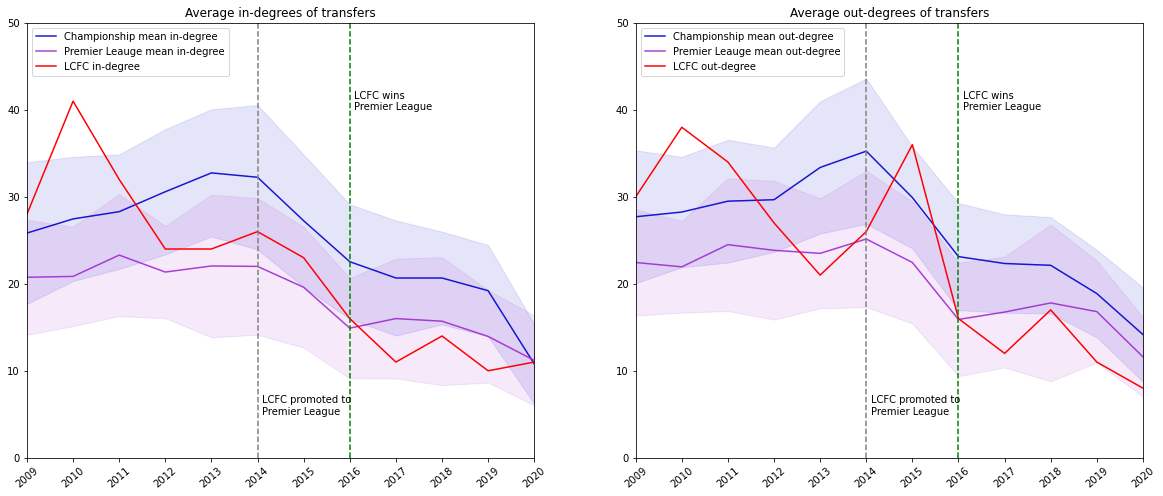

In [6]:
axes = plotting.plot_english_league_avg_degrees(include_championship=True, start_year=start_year, end_year=end_year)
for i, deg in enumerate(['in', 'out']):
    axes[i].plot(lcfc_degs[f"{deg}-degree"], label=f"LCFC {deg}-degree", color='red')
for ax in axes:
    ax.axvline(2016, linestyle='--', color='green')
    ax.axvline(2014, linestyle='--', color='grey')
    ax.text(2014.1, 5, 'LCFC promoted to \nPremier League')
    ax.text(2016.1, 40, 'LCFC wins \nPremier League')
    ax.legend()
plt.show()

# Notes
- Load up on players a few years before promotion
- Dumping of players before league win

# Top 4 vs Bottom 3

In [7]:
start_year, end_year = 2000, 2016
rankings = load.season_rankings_prem_league()
avg_degrees_df = analyse.get_league_avg_degrees(rankings=rankings, start_year=start_year, end_year=end_year)
avg_degrees_df.head()

,Top 4 out,Top 4 in,Bottom 3 out,Bottom 3 in,avg out,avg in,std out,std in
2000,12.8,11.2,18.333333,15.000000,15.85,14.45,5.179527,5.142713
2001,14.4,12.4,14.000000,17.333333,15.55,13.60,4.271709,6.311894
2002,14.4,11.6,14.333333,13.333333,16.15,14.20,5.002749,4.456456
2003,18.8,16.2,25.000000,23.333333,22.55,19.30,5.722543,5.367495
2004,18.2,14.2,19.333333,19.666667,20.60,17.70,5.944746,5.883026


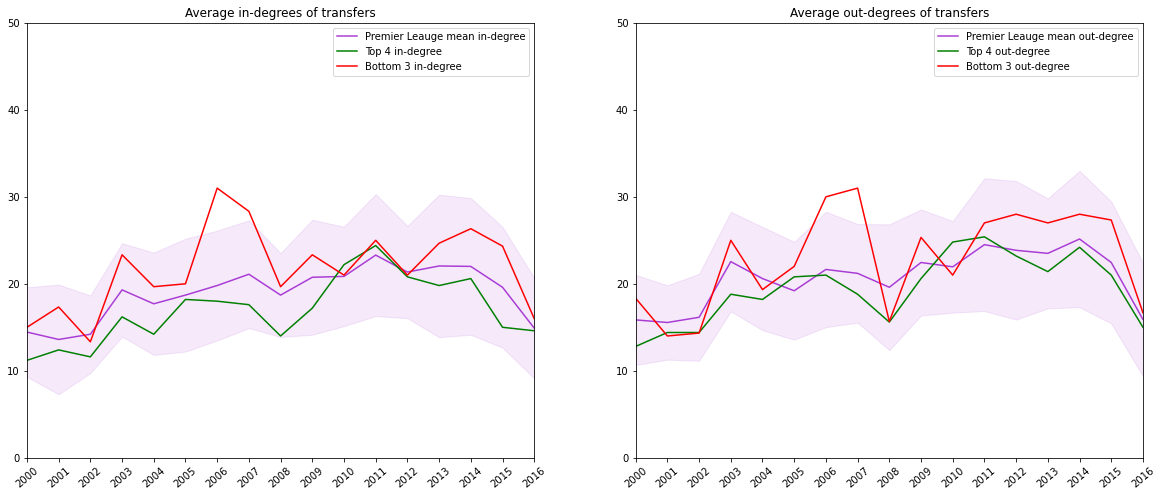

In [8]:
axes = plotting.plot_english_league_avg_degrees(include_championship=False, start_year=start_year, end_year=end_year)
for i, deg in enumerate(['in', 'out']):
    axes[i].plot(avg_degrees_df[f"Top 4 {deg}"], label=f"Top 4 {deg}-degree", color='green')
    axes[i].plot(avg_degrees_df[f"Bottom 3 {deg}"], label=f"Bottom 3 {deg}-degree", color='red')
for ax in axes:
    ax.legend()
plt.show()

# Plotting any team against avg degrees

In [9]:
start_year, end_year = 2000, 2020

degrees_df = analyse.get_league_degrees(start_year=start_year, end_year=end_year)

# print teams in prem for whole 20 years for reference
always_prem = degrees_df.dropna(axis='columns')
always_prem_teams = {c[:-10].strip() for c in always_prem.columns}
always_prem_teams

{'arsenal',
 'chelsea',
 'everton',
 'liverpool',
 'manchester united',
 'tottenham'}

In [1]:
plotting.plot_prem_teams_against_avg_deg(['manchester united', 'chelsea'], team_colors=['red', 'blue'])
plt.show()

NameError: name 'plotting' is not defined